<a href="https://colab.research.google.com/github/Ceserax/Ceserax/blob/main/Middelharnis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install orca

In [9]:
# Importing modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
import seaborn as sns
import torch
import torch.nn as nn
import time
import orca
import pprint
%matplotlib inline

In [10]:
df  = pd.read_excel('Casus_Middelharnis.xlsx')

print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

   15min   MVA
0      1  3.99
1      2  6.98 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   15min   35136 non-null  int64  
 1   MVA     35136 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 549.1 KB
None 

Describe the Dataset  

              15min           MVA
count  35136.000000  35136.000000
mean   17568.500000    -11.536940
std    10143.033866     20.060749
min        1.000000    -79.980000
25%     8784.750000    -26.640000
50%    17568.500000     -7.190000
75%    26352.250000      5.140000
max    35136.000000     23.000000 

Null Values t  

15min    0
MVA      0
dtype: int64 



In [12]:
df['15min'] = pd.date_range(start='1/1/2020', periods= 35136,freq='15min')
df

,15min,MVA
0,2020-01-01 00:00:00,3.99
1,2020-01-01 00:15:00,6.98
2,2020-01-01 00:30:00,7.76
3,2020-01-01 00:45:00,8.83
4,2020-01-01 01:00:00,6.85
...,...,...
35131,2020-12-31 22:45:00,14.44
35132,2020-12-31 23:00:00,14.19
35133,2020-12-31 23:15:00,14.14
35134,2020-12-31 23:30:00,14.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   15min   35136 non-null  datetime64[ns]
 1   MVA     35136 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 549.1 KB


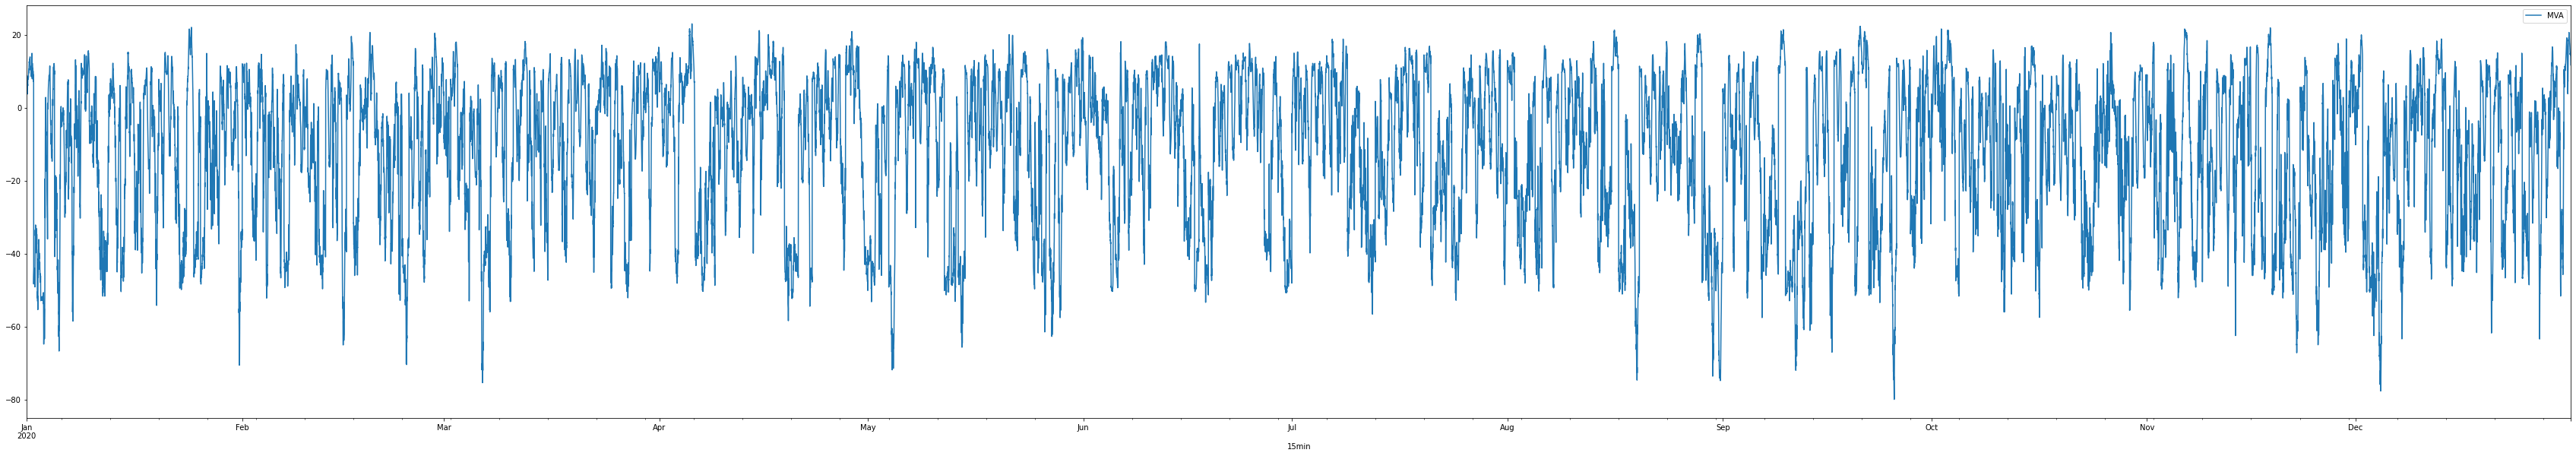

In [14]:
x = '15min'
y = 'MVA'
df.plot(x,y, figsize = (60,10))

In [15]:
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

                15min   MVA
0 2020-01-01 00:00:00  3.99
1 2020-01-01 00:15:00  6.98 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   15min   35136 non-null  datetime64[ns]
 1   MVA     35136 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 549.1 KB
None 

Describe the Dataset  

                MVA
count  35136.000000
mean     -11.536940
std       20.060749
min      -79.980000
25%      -26.640000
50%       -7.190000
75%        5.140000
max       23.000000 

Null Values t  

15min    0
MVA      0
dtype: int64 



In [17]:
df.columns = ['Datetime', 'MVA']
df

,Datetime,MVA
0,2020-01-01 00:00:00,3.99
1,2020-01-01 00:15:00,6.98
2,2020-01-01 00:30:00,7.76
3,2020-01-01 00:45:00,8.83
4,2020-01-01 01:00:00,6.85
...,...,...
35131,2020-12-31 22:45:00,14.44
35132,2020-12-31 23:00:00,14.19
35133,2020-12-31 23:15:00,14.14
35134,2020-12-31 23:30:00,14.00


## Step 2:
Reformat the Date Time Columns¶

In [19]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


,MVA,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2020-01-01,3.99,1,2020,2020-01-01,00:00:00,1,Wednesday


## Step 3

In [20]:
# How many Unique Month do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Month", df.Month.nunique(), "\n")


[2020] 

Total Number of Unique Month 12 



##  Lets us see the energy belasting Each Month

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Belasting per Month')

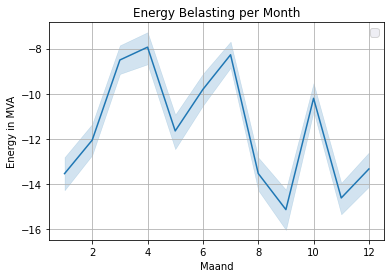

In [21]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"], y=dataset["MVA"], data=df)
sns.set(rc={'figure.figsize':(36,12)})

plt.title("Energy belasting in Month ")
plt.xlabel("Maand")
plt.ylabel("Energy in MVA")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels('months'):
    label.set_rotation(100)


plt.title("Energy Belasting per Month")

In [22]:
dataset["MVA"].mean()


-11.536940175318747

In [23]:
dataset["MVA"].max()


23.000000000000004

In [24]:
dataset["MVA"].min()

-79.98000000000002

Text(0.5, 1.0, "Energy Verdeling ('Distribution")

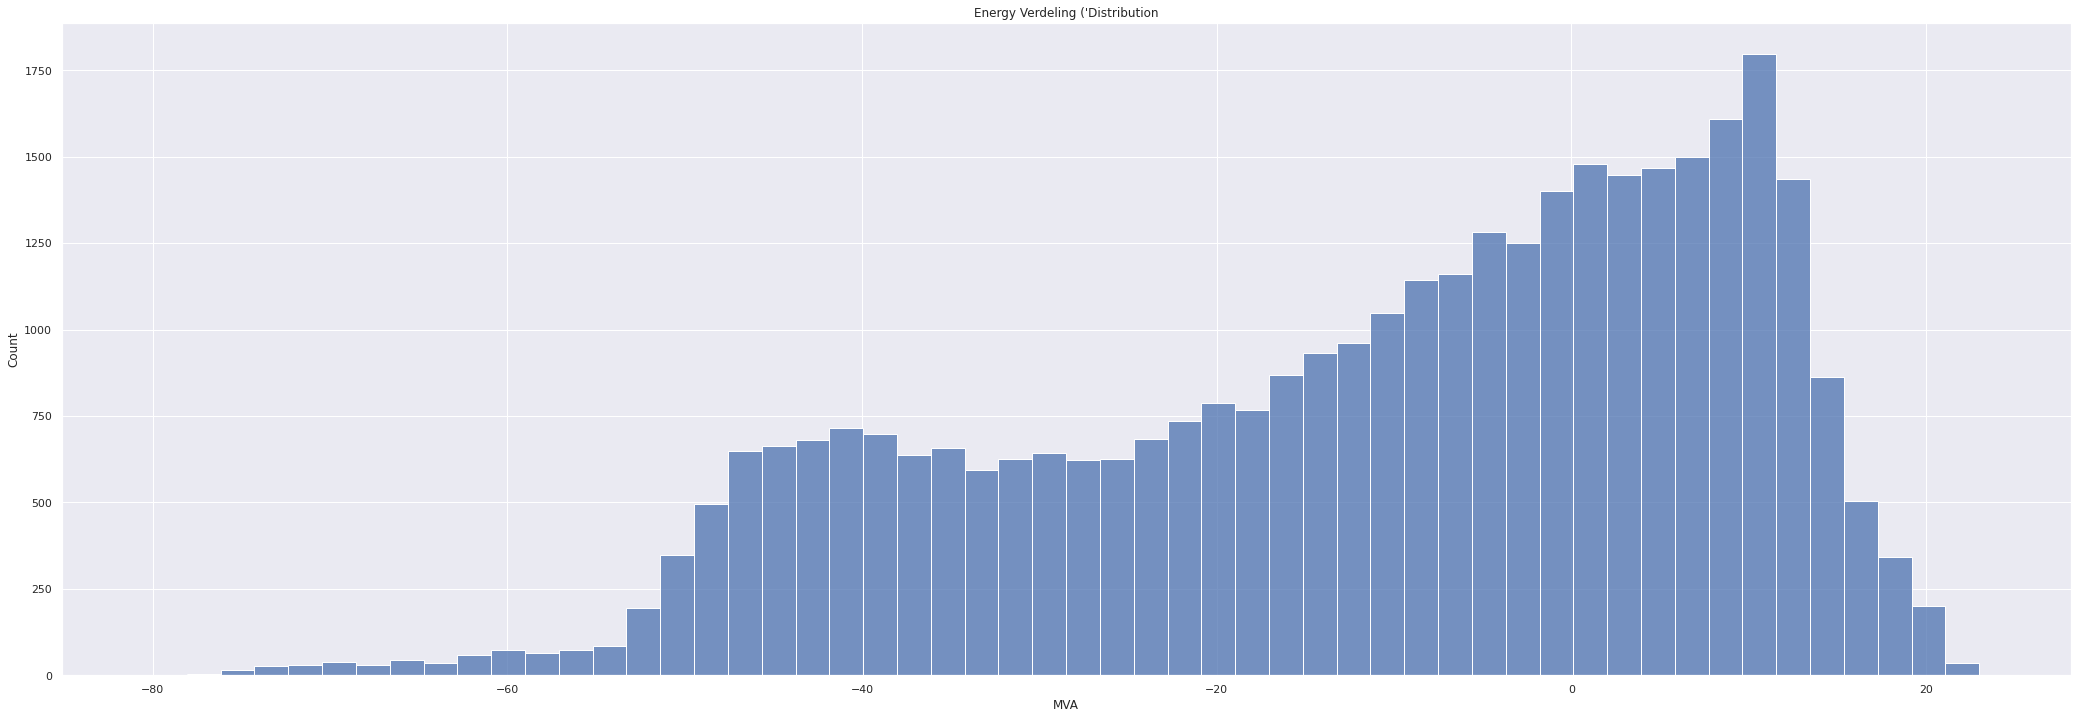

In [25]:
from matplotlib import style




sns.histplot(dataset["MVA"])
plt.title("Energy Verdeling ('Distribution")



No handles with labels found to put in legend.


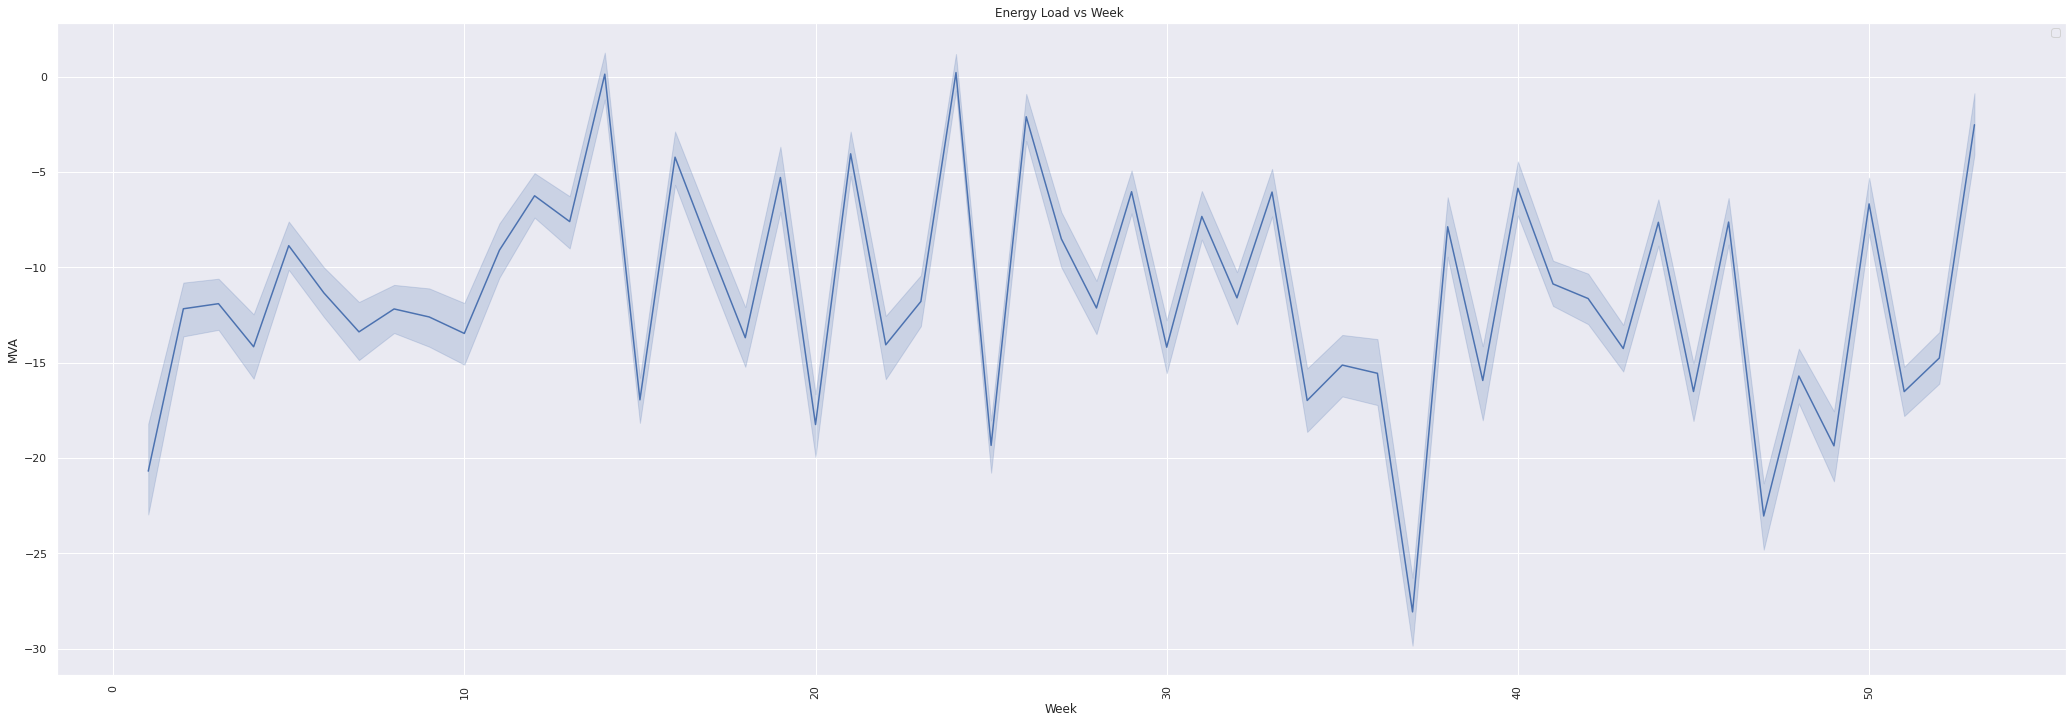

In [26]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Week"],y=dataset["MVA"], data=df)
plt.title("Energy Load vs Week ")
plt.xlabel("Week")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [27]:
NewDataSet = dataset.resample('H').mean()

In [28]:
NewDataSet

,MVA,Month,Year,Week
Datetime,,,,
2020-01-01 00:00:00,6.8900,1,2020,1
2020-01-01 01:00:00,7.1950,1,2020,1
2020-01-01 02:00:00,4.5825,1,2020,1
2020-01-01 03:00:00,6.7425,1,2020,1
2020-01-01 04:00:00,8.0950,1,2020,1
...,...,...,...,...
2020-12-31 19:00:00,18.0750,12,2020,53
2020-12-31 20:00:00,16.6400,12,2020,53
2020-12-31 21:00:00,14.9000,12,2020,53


In [29]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (35136, 7)
New  Dataset  (8784, 4)


In [30]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [31]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (8724, 1)
Test Set Shape  (100, 4)


In [32]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [33]:
Train

array([[0.85081661],
       [0.85385862],
       [0.82780202],
       ...,
       [0.93105598],
       [0.88497694],
       [0.80882683]])

In [34]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(8664, 60, 1)
(8664, 1)


In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pprint

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [36]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pprint

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [37]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(8664, 60, 1)

## Model

In [38]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
271/271 [==============================] - 55s 116ms/step - loss: 0.0661
Epoch 2/50
271/271 [==============================] - 32s 117ms/step - loss: 0.0282
Epoch 3/50
271/271 [==============================] - 32s 117ms/step - loss: 0.0151
Epoch 4/50
271/271 [==============================] - 32s 118ms/step - loss: 0.0114
Epoch 5/50
271/271 [==============================] - 32s 117ms/step - loss: 0.0103
Epoch 6/50
271/271 [==============================] - 32s 117ms/step - loss: 0.0087
Epoch 7/50
271/271 [==============================] - 32s 118ms/step - loss: 0.0090
Epoch 8/50
271/271 [==============================] - 32s 118ms/step - loss: 0.0085
Epoch 9/50
271/271 [==============================] - 33s 120ms/step - loss: 0.0079
Epoch 10/50
271/271 [==============================] - 32s 118ms/step - loss: 0.0075
Epoch 11/50
271/271 [==============================] - 32s 117ms/step - loss: 0.0074
Epoch 12/50
271/271 [==============================] - 32s 116ms/step - lo

## TestData

In [40]:
TestData.head(2)

,MVA,Month,Year,Week
Datetime,,,,
2020-12-27 20:00:00,-5.420,12,2020,52
2020-12-27 21:00:00,-3.665,12,2020,52


In [41]:
TestData.shape

(100, 4)

In [42]:
NewDataSet.shape

(8784, 4)

In [43]:
Df_Total = pd.concat((NewDataSet[["MVA"]], TestData[["MVA"]]), axis=0)

In [44]:
Df_Total.shape

(8884, 1)

In [45]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [46]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_load = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_load = sc.inverse_transform(predicted_load)

In [47]:
True_MegaWatt = TestData["MVA"].to_list()
Predicted_MegaWatt  = predicted_load
dates = TestData.index.to_list()

In [48]:

Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

## Future Predicted

In [49]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2020-12-27 20:00:00,-5.4200,8.442570
1,2020-12-27 21:00:00,-3.6650,-12.635824
2,2020-12-27 22:00:00,3.3300,-5.400852
3,2020-12-27 23:00:00,-2.2125,1.241416
4,2020-12-28 00:00:00,1.7325,-4.411399
...,...,...,...
95,2020-12-31 19:00:00,18.0750,14.927713
96,2020-12-31 20:00:00,16.6400,13.051047
97,2020-12-31 21:00:00,14.9000,11.408220
98,2020-12-31 22:00:00,14.6225,9.558518


In [50]:
True_MegaWatt = TestData["MVA"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


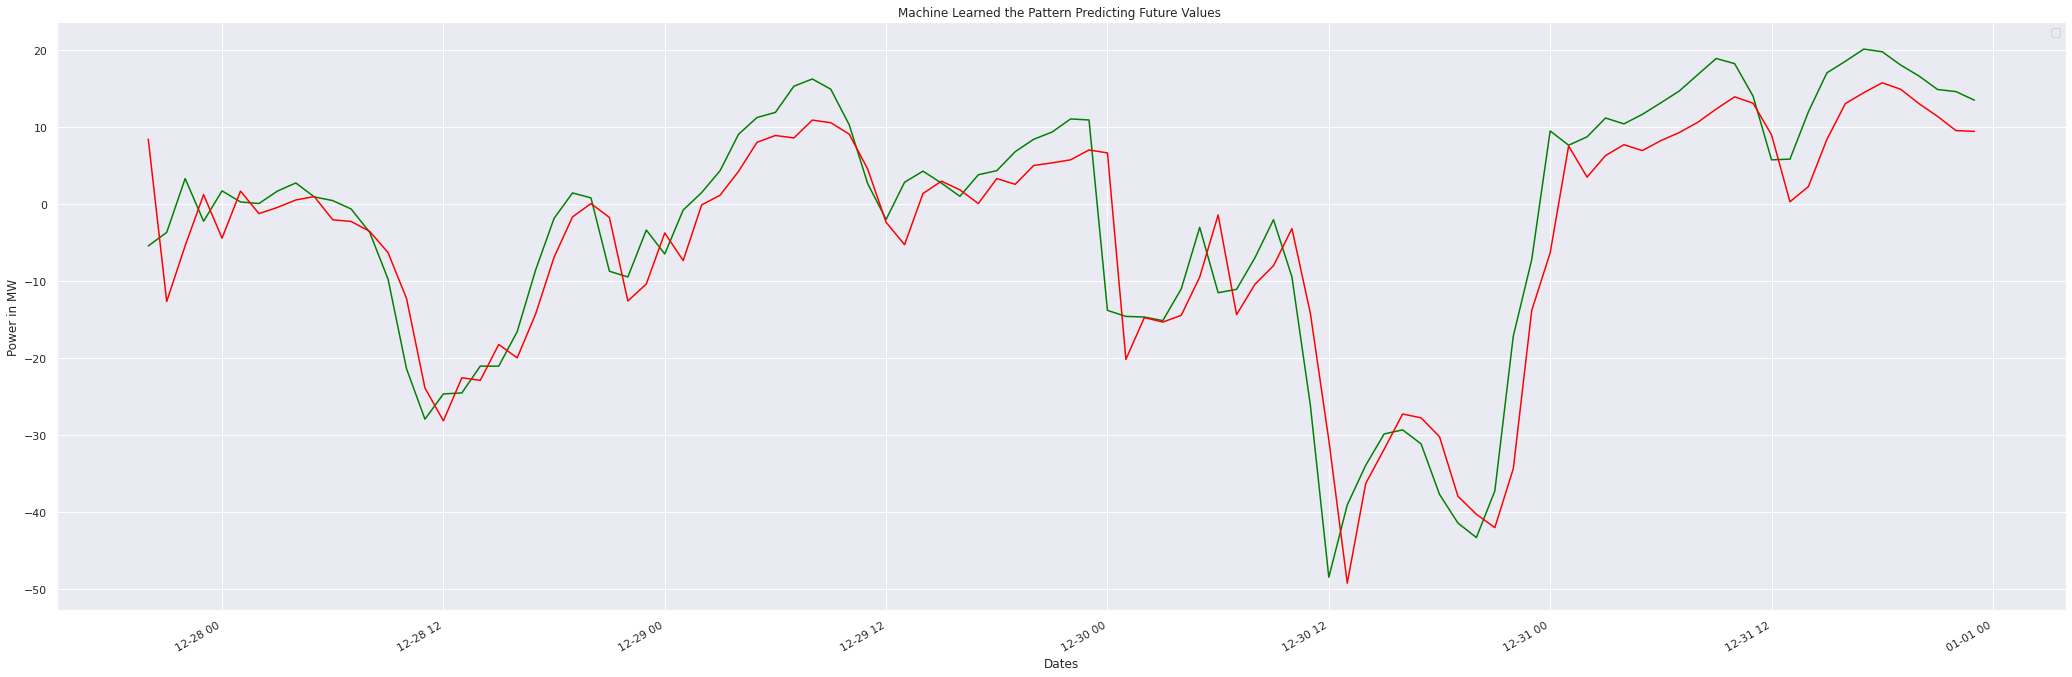

In [51]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
mean_squared_error(y_true = True_MegaWatt,
y_pred = Predicted_MegaWatt)

37.12907719047158

In [54]:
mean_absolute_error(y_true = True_MegaWatt,
y_pred = Predicted_MegaWatt)

4.781109391093254

In [55]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/ y_true)) +100


In [57]:
mean_absolute_percentage_error(y_true = True_MegaWatt,
y_pred = Predicted_MegaWatt)

100.99174499141688